In [1]:
# import netCDF4 as nc
# import skimage as ski
# from skimage import io
# import numpy as np
# from skimage.color import rgb2gray, gray2rgb
# 
# 
# 
# img = nc.Dataset('uvi_20200107_020445_365_l3b_v21.nc')['radiance'][0, :, :] 
# normalized_img = (img - np.min(img)) / (np.max(img) - np.min(img)) 
# filled_img = np.ma.filled(normalized_img, fill_value=0) 
# img_uint8 = ski.util.img_as_ubyte(filled_img.data) 
# rgb = gray2rgb(img_uint8, channel_axis=-1) 
# io.imsave("uvi_20200107_020445_365_l3b_v21.jpg", rgb) 

NameError: name 'gray2rgb' is not defined

In [97]:
import os
import netCDF4 as nc
import skimage as ski
from skimage import io
import numpy as np
from skimage.color import gray2rgb

def convert_nc_to_jpg(folder_path, output_folder):
    # Создаем выходную папку, если она не существует
    os.makedirs(output_folder, exist_ok=True)

    # Получаем список всех файлов .nc в указанной папке
    nc_files = [f for f in os.listdir(folder_path) if f.endswith('.nc')]
    
    # # Ограничиваем количество файлов до 12
    # nc_files = nc_files[:12]
    
    for nc_file in nc_files:
        # Полный путь к файлу .nc
        nc_file_path = os.path.join(folder_path, nc_file)
        
        # Читаем данные из файла .nc
        img = nc.Dataset(nc_file_path)['radiance'][0, :, :]#[0, 220:1120, 400:1160]
        # print(img.shape)
        # Нормализуем изображение
        normalized_img = (img - np.min(img)) / (np.max(img) - np.min(img))
        filled_img = np.ma.filled(normalized_img, fill_value=0)
        img_uint8 = ski.util.img_as_ubyte(filled_img.data)
        
        # Преобразуем в RGB
        rgb = gray2rgb(img_uint8, channel_axis=-1)
        # print(rgb.shape)
        # Создаем имя выходного файла .png
        png_file_name = os.path.splitext(nc_file)[0] + '.png'
        png_file_path = os.path.join(output_folder, png_file_name)
        
        # Сохраняем изображение в формате .png
        io.imsave(png_file_path, rgb)
        
        print(f"Сохранено: {png_file_path}")

# Пример использования функции
folder_path = 'r0077-0078'
output_folder = 'r0077-0078_png'
convert_nc_to_jpg(folder_path, output_folder)


Сохранено: r0077-0078_png\uvi_20180331_080446_365_l3b_v10.png
Сохранено: r0077-0078_png\uvi_20180331_100445_365_l3b_v10.png
Сохранено: r0077-0078_png\uvi_20180331_120443_365_l3b_v10.png
Сохранено: r0077-0078_png\uvi_20180331_140445_365_l3b_v10.png
Сохранено: r0077-0078_png\uvi_20180331_160444_365_l3b_v10.png
Сохранено: r0077-0078_png\uvi_20180331_180445_365_l3b_v10.png
Сохранено: r0077-0078_png\uvi_20180331_200444_365_l3b_v10.png
Сохранено: r0077-0078_png\uvi_20180331_220444_365_l3b_v10.png
Сохранено: r0077-0078_png\uvi_20180401_000445_365_l3b_v10.png
Сохранено: r0077-0078_png\uvi_20180401_100445_365_l3b_v10.png
Сохранено: r0077-0078_png\uvi_20180401_120444_365_l3b_v10.png
Сохранено: r0077-0078_png\uvi_20180401_140444_365_l3b_v10.png
Сохранено: r0077-0078_png\uvi_20180401_160445_365_l3b_v10.png
Сохранено: r0077-0078_png\uvi_20180401_180444_365_l3b_v10.png
Сохранено: r0077-0078_png\uvi_20180401_200444_365_l3b_v10.png
Сохранено: r0077-0078_png\uvi_20180402_060444_365_l3b_v10.png
Сохранен

In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [95]:
# Читаем исходный файл (без заголовка)
filename = "Corr_speeds/UVI_S04_2_365v.txt"  # Укажите путь к вашему файлу
data = pd.read_csv(filename, delim_whitespace=True, header=None)

# Определяем названия столбцов (задаём их вручную)
data.columns = [
    "id", "date", "start_time", "end_time",
    "lambda_1", "phi_1", "lambda_2", "phi_2",
    "u", "v", "grid_err_u", "grid_err_v", "corr_coef", "corr_node_filled",
    "corr_node_empty", "corr_node_empty_1", "corr_node_empty_2", "corr_node_1",
    "corr_node_2", "angle1", "angle2", "angle3",
    "angle4", "angle5", "angle6", "angle7", "angle8",
    "angle9", "angle10", "corr_qual_1", "corr_qual_2",
    "corr_qual_3", "corr_qual_4", "grade",
    "timestamp1", "timestamp2", "extra_value1", "extra_value2"
]

# Определяем уникальные пары на основе "date", "start_time", и "end_time"
pairs = data[["date", "start_time", "end_time"]].drop_duplicates()

# Обрабатываем данные для каждой пары
for _, (date, start_time, end_time) in pairs.iterrows():
    # Фильтруем строки, относящиеся к текущей паре
    subset = data[(data["date"] == date) & 
                  (data["start_time"] == start_time) & 
                  (data["end_time"] == end_time)]

    # Фильтруем
    subset = subset[subset['u'] < 0]
    subset = subset[subset['u'] > -250]
    subset = subset[abs(subset['u']/subset['v']) >= 3.5]
    subset = subset[(subset['grade'] == "_") | (subset['grade'] == "*")]
    
    # Выбираем только нужные столбцы
    output = subset[[
        "lambda_1", "phi_1", "lambda_2", "phi_2",
        "u", "v", "grade", "start_time", "end_time"
    ]]

    # Преобразуемобразуем значения lambda_1 и lambda_2 в пиксели
    output["lambda_1"] = (output["lambda_1"] * (1440 / 360)).round().astype(int)
    output["lambda_2"] = (output["lambda_2"] * (1440 / 360)).round().astype(int)

    # Преобразуем значения phi_1 и phi_2
    output["phi_1"] = ((output["phi_1"] + 90) * (720 / 180)).round().astype(int)
    output["phi_2"] = ((output["phi_2"] + 90) * (720 / 180)).round().astype(int)
    
    # Добавляем столбцы dx и dy
    output["dx"] = output["lambda_2"] - output["lambda_1"]
    output["dy"] = output["phi_2"] - output["phi_1"]
    
    # Генерируем имя файла
    output_filename = f"pair_{date}_{start_time:0>6}_{end_time:0>6}.csv"

    # Сохраняем данные в файл
    output.to_csv(f'Corr_speeds/{output_filename}', index=False)

print("Файлы успешно сохранены!")
# data

C:\Users\temur\AppData\Local\Temp\ipykernel_31944\4173538181.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filename, delim_whitespace=True, header=None)
C:\Users\temur\AppData\Local\Temp\ipykernel_31944\4173538181.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output["lambda_1"] = (output["lambda_1"] * (1440 / 360)).round().astype(int)
C:\Users\temur\AppData\Local\Temp\ipykernel_31944\4173538181.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

Файлы успешно сохранены!


C:\Users\temur\AppData\Local\Temp\ipykernel_31944\4173538181.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output["lambda_1"] = (output["lambda_1"] * (1440 / 360)).round().astype(int)
C:\Users\temur\AppData\Local\Temp\ipykernel_31944\4173538181.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output["lambda_2"] = (output["lambda_2"] * (1440 / 360)).round().astype(int)
C:\Users\temur\AppData\Local\Temp\ipykernel_31944\4173538181.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [91]:
filename = "Corr_speeds/pair_20180422_180445_200444.csv"  # Укажите путь к вашему файлу
tmp = pd.read_csv(filename)
tmp['dx'].max()

np.int64(-6)

In [92]:
# Создаём пустой массив размером (720, 1440, 2)
flow_map = np.zeros((720, 1440, 2))

# Проходим по строкам датафрейма
for _, row in output.iterrows():
    phi_idx = row["phi_1"]    # phi_1 соответствует индексу по высоте (H)
    lambda_idx = row["lambda_1"]  # lambda_1 соответствует индексу по ширине (W)
    
    # Проверяем, что индексы находятся в допустимых пределах
    if 0 <= phi_idx < 720 and 0 <= lambda_idx < 1440:
        flow_map[phi_idx, lambda_idx, 0] = row["dx"]  # Сохраняем dx
        flow_map[phi_idx, lambda_idx, 1] = row["dy"]  # Сохраняем dy

# Зануляем все значения в flow_map[:, :, 0], которые больше 0
flow_map[:, :, 0][flow_map[:, :, 0] > 0] = 0

# flow_map теперь содержит нужную информацию
print("Массив flow_map успешно сформирован:", flow_map.shape)

# flow_map[:, :, 0].max()

# # Шаг 1: Посчитаем количество ненулевых клеток до применения маски
# non_zero_count = np.count_nonzero(flow_map[:, :, 1])  # Для компоненты dx (flow_map[:, :, 0])
# non_zero_count

# Шаг 1: Создаём маску, где ненулевые значения отмечены как 1, а нулевые - как 0
mask = flow_map[:, :, 0] != 0  # Маска для компоненты dx (не нулевые значения)

# Шаг 2: Применяем маску к данным
# Создадим новые массивы, где будут использоваться только ненулевые значения
flow_map_filtered = flow_map[mask]

# Также можно получить индексы, где значения ненулевые
indices_filtered = np.argwhere(mask)

# Пример использования данных с маской:
print("Маска (ненулевые значения):")
print(mask)

print("Фильтрованные данные (ненулевые значения):")
print(flow_map_filtered)

# Теперь можно использовать `flow_map_filtered` и маску для обучения RAFT

Массив flow_map успешно сформирован: (720, 1440, 2)
Маска (ненулевые значения):
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Фильтрованные данные (ненулевые значения):
[[-35.   0.]
 [-34.  -2.]
 [-34.  -2.]
 [-33.  -2.]
 [-33.  -2.]
 [-32.  -2.]
 [-30.   0.]
 [-29.   2.]
 [-30.   1.]
 [-30.   0.]
 [-37.   1.]]


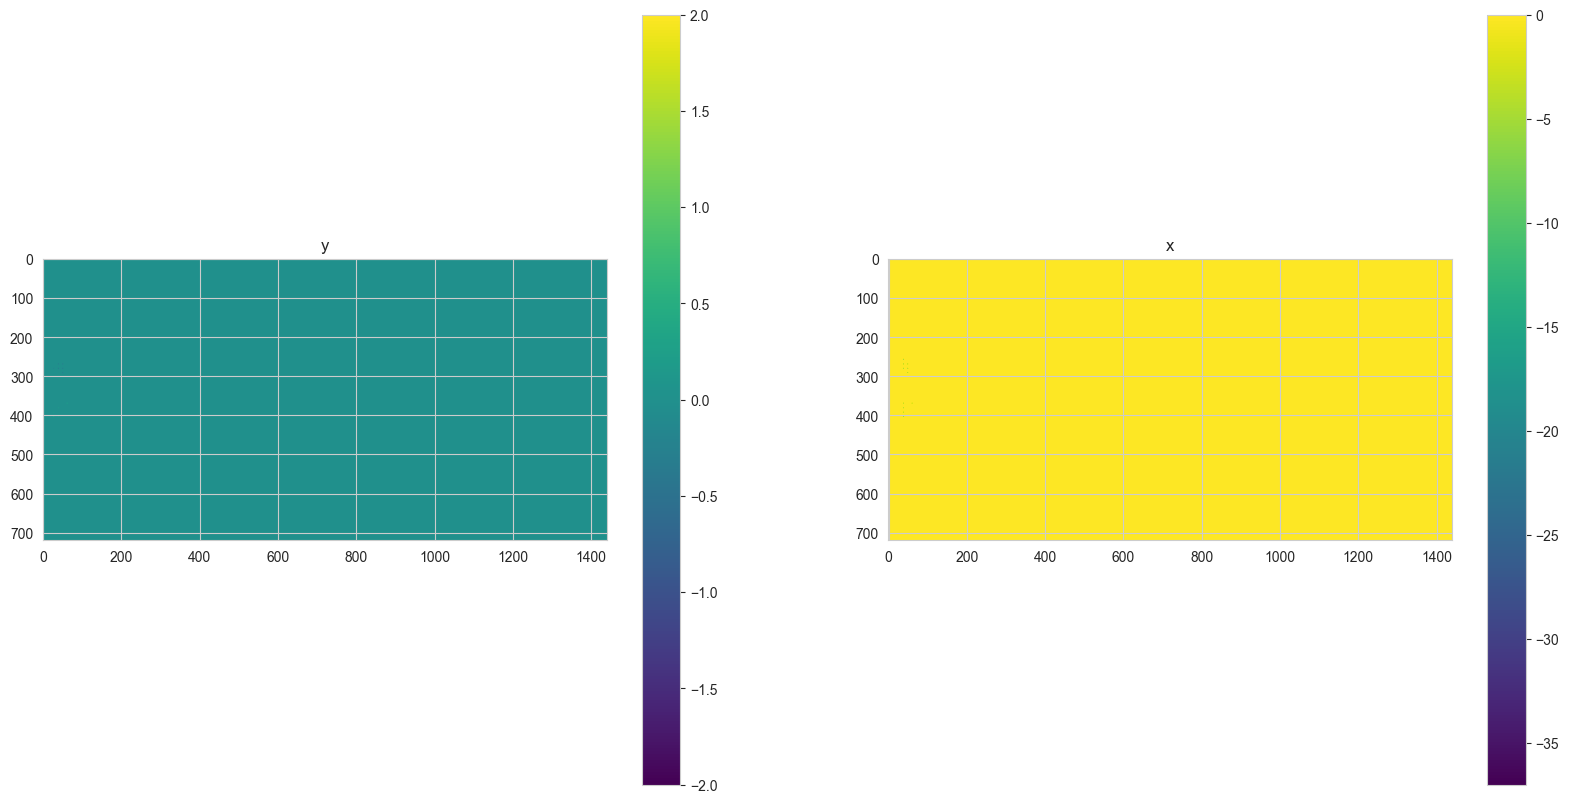

In [93]:
fig, axs = plt.subplots(figsize=(20, 10), nrows=1, ncols=2)

img = axs[0].imshow(flow_map[:, :, 1], cmap="viridis")
axs[0].set(title='y')
plt.colorbar(img, ax=axs[0])

img = axs[1].imshow(flow_map[:, :, 0], cmap="viridis")
axs[1].set(title='x')

plt.colorbar(img, ax=axs[1])
plt.show()

In [3]:
import os
import numpy as np
import pandas as pd

def prepare_flow_map(df, image_width, image_height):
    """
    Преобразует датафрейм с координатами и потоками в карту оптического потока.
    
    Parameters:
    - df: pandas.DataFrame, содержащий координаты и значения потоков.
    - image_width: int, ширина изображения.
    - image_height: int, высота изображения.

    Returns:
    - flow_map: np.ndarray, карта оптического потока размером (image_height, image_width, 2).
    """
    flow_map = np.zeros((image_height, image_width, 2), dtype=np.float32)
    for _, row in df.iterrows():
        x1, y1 = int(row['lambda_1']), int(row['phi_1'])
        dx, dy = row['dx'], row['dy']
        if 0 <= x1 < image_width and 0 <= y1 < image_height:
            flow_map[y1, x1, 0] = dx
            flow_map[y1, x1, 1] = dy
            
    # Зануляем все значения в flow_map[:, :, 0], которые больше 0
    flow_map[:, :, 0][flow_map[:, :, 0] > 0] = 0
    
    return flow_map

def create_valid_mask(flow_map):
    """
    Создаёт маску валидных пикселей для карты потока.
    
    Parameters:
    - flow_map: np.ndarray, карта потока размером (H, W, 2).

    Returns:
    - valid_mask: np.ndarray, бинарная маска размером (H, W), где 1 - валидные пиксели, 0 - пропущенные.
    """
    valid_mask = np.any(flow_map != 0, axis=-1).astype(np.uint8)
    return valid_mask

def save_flow_as_flo(flow, filename):
    """
    Сохраняет карту потока в формате .flo (Middlebury Flow Format).
    
    Parameters:
    - flow: np.ndarray, карта потока размером (H, W, 2).
    - filename: str, путь для сохранения файла.
    """
    with open(filename, 'wb') as f:
        f.write(b'PIEH')  # Заголовок
        height, width = flow.shape[:2]
        f.write(np.array([width, height], dtype=np.int32).tobytes())
        f.write(flow.astype(np.float32).tobytes())

def process_csv_folder(input_folder, output_folder, image_width, image_height):
    """
    Обрабатывает все .csv файлы в папке, конвертирует их в карты потока и сохраняет потоки и маски.
    
    Parameters:
    - input_folder: str, путь к папке с .csv файлами.
    - output_folder: str, путь к папке для сохранения данных.
    - image_width: int, ширина изображения.
    - image_height: int, высота изображения.
    """
    flow_folder = os.path.join(output_folder, "flows")
    mask_folder = os.path.join(output_folder, "masks")

    # Создаём выходные папки, если их нет
    os.makedirs(flow_folder, exist_ok=True)
    os.makedirs(mask_folder, exist_ok=True)

    for csv_file in os.listdir(input_folder):
        if csv_file.endswith('.csv'):
            csv_path = os.path.join(input_folder, csv_file)
            df = pd.read_csv(csv_path)

            # Преобразование в карту потока
            flow_map = prepare_flow_map(df, image_width, image_height)

            # Создание маски
            valid_mask = create_valid_mask(flow_map)

            # Сохранение карты потока в .flo
            flow_output_path = os.path.join(flow_folder, os.path.splitext(csv_file)[0] + '.flo')
            save_flow_as_flo(flow_map, flow_output_path)

            # Сохранение маски в .npy
            mask_output_path = os.path.join(mask_folder, os.path.splitext(csv_file)[0] + '.npy')
            np.save(mask_output_path, valid_mask)

            print(f"Сохранено: {flow_output_path} и {mask_output_path}")

# Указание путей и параметров
input_folder = "Corr_speeds"  # Папка с CSV
output_folder = "GT_flow"     # Папка для сохранения результатов
image_width, image_height = 1440, 720

# Запуск обработки
process_csv_folder(input_folder, output_folder, image_width, image_height)


Сохранено: GT_flow\flows\pair_20180331_080446_100445.flo и GT_flow\masks\pair_20180331_080446_100445.npy
Сохранено: GT_flow\flows\pair_20180331_100445_120443.flo и GT_flow\masks\pair_20180331_100445_120443.npy
Сохранено: GT_flow\flows\pair_20180331_140445_160444.flo и GT_flow\masks\pair_20180331_140445_160444.npy
Сохранено: GT_flow\flows\pair_20180331_160444_180445.flo и GT_flow\masks\pair_20180331_160444_180445.npy
Сохранено: GT_flow\flows\pair_20180331_180445_200444.flo и GT_flow\masks\pair_20180331_180445_200444.npy
Сохранено: GT_flow\flows\pair_20180331_200444_220444.flo и GT_flow\masks\pair_20180331_200444_220444.npy
Сохранено: GT_flow\flows\pair_20180331_220444_000445.flo и GT_flow\masks\pair_20180331_220444_000445.npy
Сохранено: GT_flow\flows\pair_20180401_100445_120444.flo и GT_flow\masks\pair_20180401_100445_120444.npy
Сохранено: GT_flow\flows\pair_20180401_120444_140444.flo и GT_flow\masks\pair_20180401_120444_140444.npy
Сохранено: GT_flow\flows\pair_20180401_140444_160445.fl

In [ ]:
# Указание путей и параметров
input_folder = "Corr_speeds"
output_folder = "GT_flow"
image_width, image_height = 1440, 720

# Запуск обработки
process_csv_folder(input_folder, output_folder, image_width, image_height)

In [18]:
# import os
# 
# def match_files(images_folder, flows_folder, masks_folder):
#     """
#     Сопоставляет пары изображений с потоками и масками.
#     
#     Parameters:
#     - images_folder: str, путь к папке с изображениями.
#     - flows_folder: str, путь к папке с потоками.
#     - masks_folder: str, путь к папке с масками.
# 
#     Returns:
#     - matched_files: list of dict, список с информацией о найденных парах.
#     """
#     matched_files = []
#     
#     # Список всех изображений
#     image_files = sorted(os.listdir(images_folder))
#     image_dict = {f.split('_')[1] + '_' + f.split('_')[2]: f for f in image_files}  # Создаем индекс по date_time
#     # print(image_dict)
#     # Список всех потоков
#     flow_files = sorted(os.listdir(flows_folder))
# 
#     for flow_file in flow_files:
#         if not flow_file.endswith('.flo'):
#             continue
# 
#         # Извлекаем информацию из имени потока
#         _, date, time_1, time_2 = flow_file.replace('.flo', '').split('_')
#         # print(_, date, time_1, time_2)
#         # Ищем соответствующие изображения
#         img1_name = image_dict.get(f"{date}_{time_1}")
#         img2_name = image_dict.get(f"{date}_{time_2}")
#         # print(img1_name, img2_name)
# 
#         if not img1_name or not img2_name:
#             print(f"Пропущены изображения для потока {flow_file}")
#             continue

#         # Проверяем наличие маски
#         mask_file = flow_file.replace('.flo', '.npy')  # Имя маски совпадает с именем потока
#         if not os.path.exists(os.path.join(masks_folder, mask_file)):
#             print(f"Пропущена маска для потока {flow_file}")
#             continue
#         
#         # Добавляем в список
#         matched_files.append({
#             'img1': os.path.join(images_folder, img1_name),
#             'img2': os.path.join(images_folder, img2_name),
#             'flow': os.path.join(flows_folder, flow_file),
#             'mask': os.path.join(masks_folder, mask_file)
#         })
#     
#     return matched_files
# 
# # Папки с данными
# images_folder = "r0077-0078_png/small"
# flows_folder = "GT_flow/flows"
# masks_folder = "GT_flow/masks"
# 
# # Сопоставляем файлы
# matched_files = match_files(images_folder, flows_folder, masks_folder)
# 
# # Проверяем результат
# print(f"Найдено пар: {len(matched_files)}")
# for match in matched_files[:5]:  # Выводим первые 5 для проверки
#     print(match)


Пропущены изображения для потока pair_20180331_220444_000445.flo
Пропущены изображения для потока pair_20180404_224445_004445.flo
Пропущены изображения для потока pair_20180405_224444_004446.flo
Пропущены изображения для потока pair_20180408_230446_010445.flo
Пропущены изображения для потока pair_20180409_230444_010447.flo
Пропущены изображения для потока pair_20180410_220446_000444.flo
Пропущены изображения для потока pair_20180412_220443_000446.flo
Пропущены изображения для потока pair_20180415_190446_210447.flo
Найдено пар: 91
{'img1': 'r0077-0078_png/small\\uvi_20180331_080446_365_l3b_v10.png', 'img2': 'r0077-0078_png/small\\uvi_20180331_100445_365_l3b_v10.png', 'flow': 'GT_flow/flows\\pair_20180331_080446_100445.flo', 'mask': 'GT_flow/masks\\pair_20180331_080446_100445.npy'}
{'img1': 'r0077-0078_png/small\\uvi_20180331_100445_365_l3b_v10.png', 'img2': 'r0077-0078_png/small\\uvi_20180331_120443_365_l3b_v10.png', 'flow': 'GT_flow/flows\\pair_20180331_100445_120443.flo', 'mask': 'GT_

In [19]:
import json

with open('matched_files.json', 'w') as f:
    json.dump(matched_files, f)


In [25]:
import os
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
from PIL import Image

def prepare_flow_map_with_interpolation(df, image_width, image_height, mask):
    """
    Преобразует датафрейм с координатами и потоками в карту оптического потока с интерполяцией.
    """
    flow_map = np.zeros((image_height, image_width, 2), dtype=np.float32)
    points = []
    values = []

    for _, row in df.iterrows():
        x1, y1 = int(row['lambda_1']), int(row['phi_1'])
        dx, dy = row['dx'], row['dy']
        if 0 <= x1 < image_width and 0 <= y1 < image_height:
            points.append((x1, y1))
            values.append((dx, dy))

    # Интерполяция
    grid_x, grid_y = np.meshgrid(np.arange(image_width), np.arange(image_height))
    if points:
        points = np.array(points)
        values = np.array(values)
        interpolated_flow = griddata(points, values, (grid_x, grid_y), method='linear', fill_value=0)
        flow_map[..., 0] = interpolated_flow[..., 0]
        flow_map[..., 1] = interpolated_flow[..., 1]

    # Учитываем маску (зануляем потоки в тёмных областях)
    flow_map *= mask[..., None]

    return flow_map

def create_dark_area_mask(img1, img2):
    """
    Создаёт маску валидных пикселей, исключая тёмные области.
    """
    non_zero_1 = img1 != 0
    non_zero_2 = img2 != 0
    mask = non_zero_1 & non_zero_2
    return mask.astype(np.uint8)

def save_flow_as_flo(flow, filename):
    """
    Сохраняет карту потока в формате .flo (Middlebury Flow Format).
    """
    with open(filename, 'wb') as f:
        f.write(b'PIEH')  # Заголовок
        height, width = flow.shape[:2]
        f.write(np.array([width, height], dtype=np.int32).tobytes())
        f.write(flow.astype(np.float32).tobytes())

def process_csv_folder_with_dark_areas(input_folder, output_folder, image_width, image_height, image_folder):
    """
    Обрабатывает все .csv файлы в папке, конвертирует их в карты потока, выполняет интерполяцию и сохраняет результат.
    """
    flow_folder = os.path.join(output_folder, "flows")

    # Создаём выходную папку, если её нет
    os.makedirs(flow_folder, exist_ok=True)

    # Создаём словарь изображений с ключом в формате "date_time"
    image_files = sorted(os.listdir(image_folder))
    image_dict = {}
    for image_file in image_files:
        if image_file.endswith('.png'):
            parts = image_file.split('_')
            date, time = parts[1], parts[2]
            image_dict[f"{date}_{time}"] = image_file

    for csv_file in os.listdir(input_folder):
        if csv_file.endswith('.csv'):
            # Извлекаем дату и время из имени файла потока
            base_name = os.path.splitext(csv_file)[0]
            _, date, time_1, time_2 = base_name.split('_')

            # Поиск соответствующих изображений
            img1_name = image_dict.get(f"{date}_{time_1}")
            img2_name = image_dict.get(f"{date}_{time_2}")

            if not img1_name or not img2_name:
                print(f"Пропущены изображения для файла {csv_file}")
                continue

            # Полные пути к изображениям
            img1_path = os.path.join(image_folder, img1_name)
            img2_path = os.path.join(image_folder, img2_name)

            # Загрузка изображений
            img1 = np.array(Image.open(img1_path).convert('L'))
            img2 = np.array(Image.open(img2_path).convert('L'))

            # Создание маски
            mask = create_dark_area_mask(img1, img2)

            # Загрузка данных CSV
            csv_path = os.path.join(input_folder, csv_file)
            df = pd.read_csv(csv_path)

            # Преобразование в карту потока с интерполяцией
            flow_map = prepare_flow_map_with_interpolation(df, image_width, image_height, mask)

            # Сохранение карты потока в .flo
            flow_output_path = os.path.join(flow_folder, base_name + '.flo')
            save_flow_as_flo(flow_map, flow_output_path)

            print(f"Сохранено: {flow_output_path}")

# Указание путей и параметров
input_folder = "Corr_speeds"  # Папка с CSV
output_folder = "GT_flow"     # Папка для сохранения результатов
image_width, image_height = 1440, 720
image_folder = "r0077-0078_png/small"       # Папка с парами изображений

# Запуск обработки
process_csv_folder_with_dark_areas(input_folder, output_folder, image_width, image_height, image_folder)


Сохранено: GT_flow\flows\pair_20180331_080446_100445.flo
Сохранено: GT_flow\flows\pair_20180331_100445_120443.flo
Сохранено: GT_flow\flows\pair_20180331_140445_160444.flo
Сохранено: GT_flow\flows\pair_20180331_160444_180445.flo
Сохранено: GT_flow\flows\pair_20180331_180445_200444.flo
Сохранено: GT_flow\flows\pair_20180331_200444_220444.flo
Пропущены изображения для файла pair_20180331_220444_000445.csv
Сохранено: GT_flow\flows\pair_20180401_100445_120444.flo
Сохранено: GT_flow\flows\pair_20180401_120444_140444.flo
Сохранено: GT_flow\flows\pair_20180401_140444_160445.flo
Сохранено: GT_flow\flows\pair_20180401_160445_180444.flo
Сохранено: GT_flow\flows\pair_20180401_180444_200444.flo
Сохранено: GT_flow\flows\pair_20180402_080445_100443.flo
Сохранено: GT_flow\flows\pair_20180402_100443_120444.flo
Сохранено: GT_flow\flows\pair_20180402_120444_140443.flo
Сохранено: GT_flow\flows\pair_20180402_140443_160443.flo
Сохранено: GT_flow\flows\pair_20180402_160443_180444.flo
Сохранено: GT_flow\flows

In [26]:
import os
import shutil

def reorganize_for_raft(input_image_folder, input_flow_folder, output_folder):
    """
    Пересохраняет и переименовывает файлы, чтобы они соответствовали требованиям RAFT.

    Parameters:
    - input_image_folder: str, путь к папке с исходными изображениями.
    - input_flow_folder: str, путь к папке с исходными потоками.
    - output_folder: str, путь к папке, где будет создана структура RAFT.
    """
    # Создаём папки для изображений и потоков
    images_output_folder = os.path.join(output_folder, "images")
    flows_output_folder = os.path.join(output_folder, "flows")
    os.makedirs(images_output_folder, exist_ok=True)
    os.makedirs(flows_output_folder, exist_ok=True)

    # Список всех изображений
    image_files = sorted(os.listdir(input_image_folder))
    image_dict = {}
    for image_file in image_files:
        if image_file.endswith('.png'):
            parts = image_file.split('_')
            date, time = parts[1], parts[2]
            image_dict[f"{date}_{time}"] = image_file

    # Список всех потоков
    flow_files = sorted(os.listdir(input_flow_folder))

    for flow_file in flow_files:
        if not flow_file.endswith('.flo'):
            continue

        # Извлекаем информацию из имени потока
        _, date, time_1, time_2 = flow_file.replace('.flo', '').split('_')

        # Проверяем, что изображения существуют
        img1_name = image_dict.get(f"{date}_{time_1}")
        img2_name = image_dict.get(f"{date}_{time_2}")
        if not img1_name or not img2_name:
            print(f"Пропущены изображения для потока {flow_file}")
            continue

        # Путь к подпапке текущей пары
        pair_folder = os.path.join(images_output_folder, f"{date}_{time_1}_{time_2}")
        os.makedirs(pair_folder, exist_ok=True)

        # Копируем изображения в подпапку
        img1_path = os.path.join(input_image_folder, img1_name)
        img2_path = os.path.join(input_image_folder, img2_name)
        shutil.copy(img1_path, os.path.join(pair_folder, "img1.png"))
        shutil.copy(img2_path, os.path.join(pair_folder, "img2.png"))

        # Копируем поток в папку flows
        flow_src_path = os.path.join(input_flow_folder, flow_file)
        flow_dest_path = os.path.join(flows_output_folder, f"{date}_{time_1}_{time_2}.flo")
        shutil.copy(flow_src_path, flow_dest_path)

        print(f"Обработана пара: {flow_file}, сохранено в {pair_folder}")

# Указание путей
input_image_folder = "r0077-0078_png/small"  # Папка с исходными изображениями
input_flow_folder = "GT_flow/flows"  # Папка с исходными потоками
output_folder = "Venus_dataset"  # Папка для сохранения в формате RAFT

# Запуск пересохранения
reorganize_for_raft(input_image_folder, input_flow_folder, output_folder)


Обработана пара: pair_20180331_080446_100445.flo, сохранено в Venus_dataset\images\20180331_080446_100445
Обработана пара: pair_20180331_100445_120443.flo, сохранено в Venus_dataset\images\20180331_100445_120443
Обработана пара: pair_20180331_140445_160444.flo, сохранено в Venus_dataset\images\20180331_140445_160444
Обработана пара: pair_20180331_160444_180445.flo, сохранено в Venus_dataset\images\20180331_160444_180445
Обработана пара: pair_20180331_180445_200444.flo, сохранено в Venus_dataset\images\20180331_180445_200444
Обработана пара: pair_20180331_200444_220444.flo, сохранено в Venus_dataset\images\20180331_200444_220444
Пропущены изображения для потока pair_20180331_220444_000445.flo
Обработана пара: pair_20180401_100445_120444.flo, сохранено в Venus_dataset\images\20180401_100445_120444
Обработана пара: pair_20180401_120444_140444.flo, сохранено в Venus_dataset\images\20180401_120444_140444
Обработана пара: pair_20180401_140444_160445.flo, сохранено в Venus_dataset\images\2018